In [13]:
import matplotlib.pyplot as plt
import tensorflow as tf
mnist = tf.keras.datasets.mnist #28x28 images of hand-wtitten digits 0-9
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [14]:
#values of pixel in nubers images in dataset are between 0 and 255
#we will normalized them to be between 1 and 0 so we can use them as input neurons 
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)
#print(x_train[0])

In [15]:
model = tf.keras.models.Sequential()
#adding layers to the model
model.add(tf.keras.layers.Flatten()) #input layer (images are stored in multi damention array, we want to Flatten them to pass them as array of neurons
# we will use 2 hidden layer
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))#activation function (line function for x>0), we could alsow use for example Sigmoid fuction
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))       
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))#output layer, softmax activation function for probality distribution (similar to Sigmoid)

In [16]:
#traing of the model

#optimizer = chose the way of calculating vector that points in witch direction improve weight of conection between neurons
#loss way of calculating function of cost
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2616 - accuracy: 0.9241
Epoch 2/3
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1067 - accuracy: 0.9669
Epoch 3/3
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0729 - accuracy: 0.9768


In [17]:
val_loss, val_acc = model.evaluate(x_test,y_test)
print(val_loss, val_acc)

313/313 [==============================] - 0s 873us/step - loss: 0.0955 - accuracy: 0.9702
0.09554189443588257 0.9702000021934509


In [18]:
model.save('num_read.model')


INFO:tensorflow:Assets written to: num_read.model\assets


INFO:tensorflow:Assets written to: num_read.model\assets


In [19]:
new_model = tf.keras.models.load_model('num_read.model')

In [20]:
predictions = new_model.predict([x_test])

313/313 [==============================] - 0s 824us/step


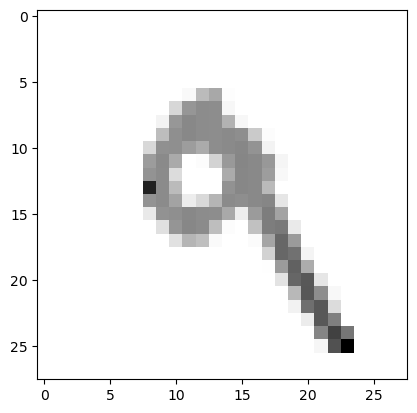

prediction= 9


In [24]:
import numpy as np
plt.imshow(x_test[7], cmap = plt.cm.binary)
plt.show()
print("prediction= " + str(np.argmax(predictions[7])))